<a href="https://colab.research.google.com/github/ssunart/ML-DL-study/blob/main/Ch5_%EC%B0%A8%EC%9B%90_%EC%B6%95%EC%86%8C%EB%A5%BC_%ED%86%B5%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%95%95%EC%B6%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data',header=None)

In [2]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# Wine dataset을 7:3 비율로 나누기
from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


In [4]:
# 특성을 표준화 및 전처리
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:

# 확인
print("Training data after standardization:", X_train_std[:5])
print("Test data after standardization:", X_test_std[:5])

Training data after standardization: [[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584
  -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144
  -0.62946362]
 [ 0.88229214 -0.70457155  1.17533605 -0.09065504  2.34147876  1.01675879
   0.66299475  1.0887425  -0.49293533  0.13152077  1.33982592  0.54931269
   1.47568796]
 [ 0.84585645 -0.73022996  1.17533605  0.81104754  0.13597904  1.09807851
   1.16326665 -0.64419483  1.25249578  0.25863359  1.06806189  0.1308109
   1.62934866]
 [ 0.57866141 -0.4736459   0.98882252 -0.24093881  0.77628541  0.04092218
   0.45700044 -0.64419483 -0.1709626  -0.37693052  0.66041583  0.36170844
   1.045438  ]
 [-0.52655446  0.09083903 -0.68979922 -0.39122257 -0.36203702 -1.1463457
  -1.37732987  2.16151323 -1.18771859  0.85182676 -1.01546239 -1.49990297
  -0.18384759]]
Test data after standardization: [[ 0.89443737 -0.38811788  1.10073064 -0.81201711  1.13201117  1.09807851
   0.71204102  0.18101342  0.06628046  0.5

In [6]:
#Wine dataset의 공분산 행렬에 대한 고유 벡터와 고윳값 쌍 계산
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("\n고윳값 \n%s" % eigen_vals)



고윳값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


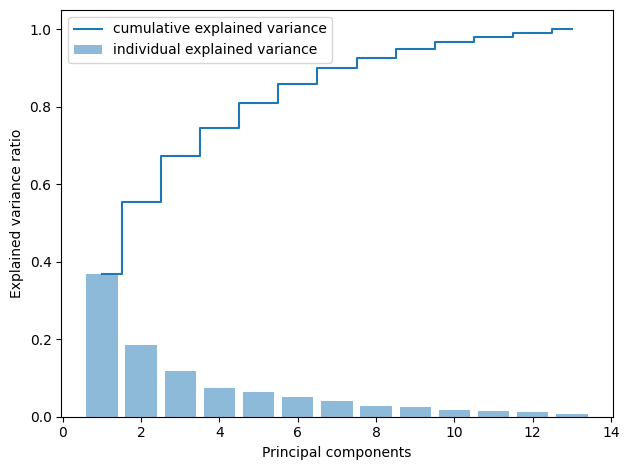

In [7]:
#cumsum함수로 설명된 분산의 누적 합 계산.
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

#step함수로 그래프그리기
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
# 고윳값, 고유 벡터 튜플 리스트 만들기
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# 고윳값 기준으로 내림차순 정렬
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [9]:
#가장 큰 2개의 고윳값에 해당하는 고유 벡터 선택 (분산의 약 60% 선택)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [10]:
#최상위 2개 고유벡터로부터 13x2 차원의 투영 행렬 W를 만든다.
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [11]:
#전체 124x13차원의 훈련 데이터셋을 행렬 점곱으로 두 개의 주성분에 투영하기.
X_train_pca = X_train_std.dot(w)
X_train_pca

array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979],
       [ 0.50253552, -2.08907131],
       [ 0.04867722, -2.27536044],
       [ 2.47888989, -0.08603318],
       [ 2.01900259, -1.3538719 ],
       [ 0.75156583, -2.55367947],
       [ 0.72268915, -1.18404391],
       [-3.00366211,  0.94626934],
       [ 2.57518878, -1.0697549 ],
       [ 3.73151104,  1.01968876],
       [-1.12276518,  0.13877   ],
       [ 2.85996853,  2.28819559],
       [-0.74717125, -3.21746061],
       [-1.58427878,  0.16048055],
       [ 3.38887101,  2.11550689],
       [ 3.15405473,  0.54233966],
       [-1.28036506, -1.72926871],
       [-1.71438911,  0.71745249],
       [-1.55040291, -1.7580591 ],
       [ 1.10984489, -1.20480693],
       [-0.69108418, -1.71385374],
       [-2.086036  , -1.68453671],
       [ 2.90393456,  1.95258805],
       [-2.07635784,  1.47183304],
       [-1.74756185,

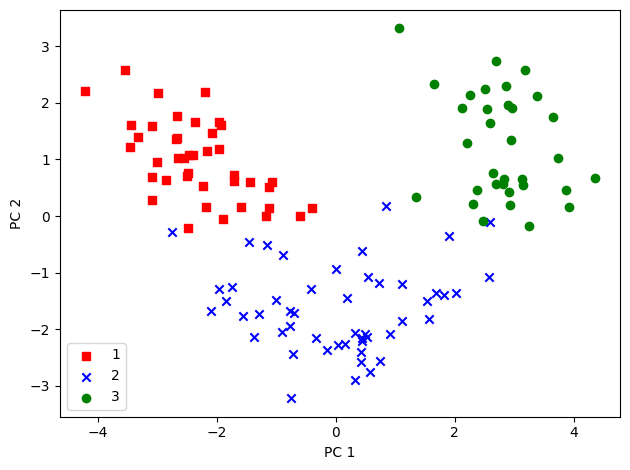

In [12]:
#124x2 차원의 행렬로 변환된 Wine 훈련 데이터셋을 2차원 산점도로 시각화
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [13]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  #마커와 컬러맵 준비
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  #결정 경계 그리기
  x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # class 샘플 표시
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors(idx), marker=markers[idx], label=f'Class{cl}', edgecolor='black')

<ipython-input-14-c815800b0284>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


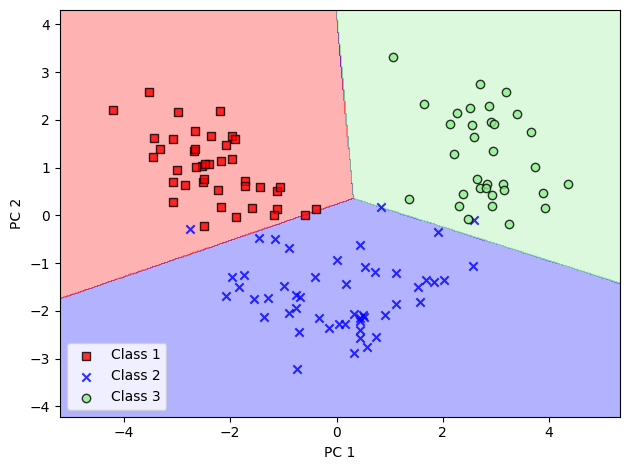

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
# PCA 변환기의 로지스틱 회귀 추정기 초기화
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

# 차원 축소
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# 축소된 데이터셋으로 로지스틱 회귀 모델 훈련
lr.fit(X_train_pca, y_train)

# 결정 경계 시각화
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


<ipython-input-14-c815800b0284>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


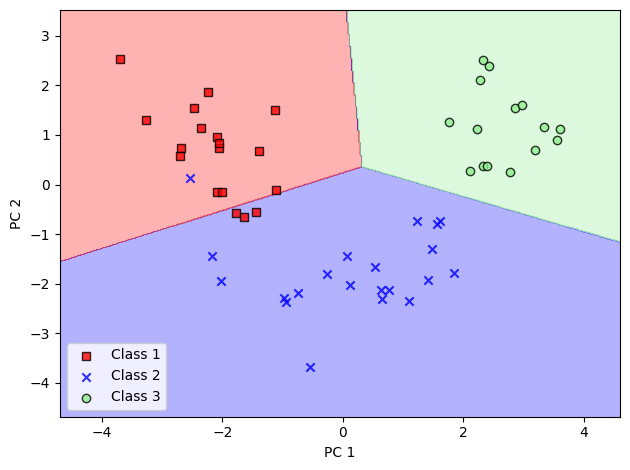

In [19]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [20]:
pca=PCA(n_components=None)
X_train_pca=pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

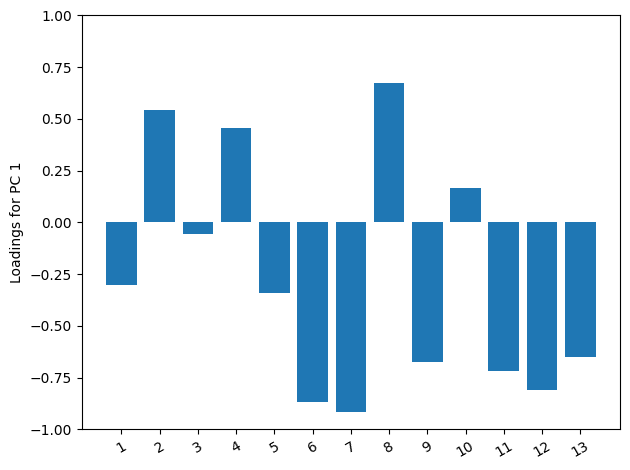

In [21]:
loadings = eigen_vecs * np.sqrt(eigen_vals)
loadings

fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=30)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data',header=None)

In [23]:
# Wine dataset을 7:3 비율로 나누기
from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [24]:
# 특성을 표준화 및 전처리
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
# 확인
print("Training data after standardization:", X_train_std[:5])
print("Test data after standardization:", X_test_std[:5])

Training data after standardization: [[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584
  -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144
  -0.62946362]
 [ 0.88229214 -0.70457155  1.17533605 -0.09065504  2.34147876  1.01675879
   0.66299475  1.0887425  -0.49293533  0.13152077  1.33982592  0.54931269
   1.47568796]
 [ 0.84585645 -0.73022996  1.17533605  0.81104754  0.13597904  1.09807851
   1.16326665 -0.64419483  1.25249578  0.25863359  1.06806189  0.1308109
   1.62934866]
 [ 0.57866141 -0.4736459   0.98882252 -0.24093881  0.77628541  0.04092218
   0.45700044 -0.64419483 -0.1709626  -0.37693052  0.66041583  0.36170844
   1.045438  ]
 [-0.52655446  0.09083903 -0.68979922 -0.39122257 -0.36203702 -1.1463457
  -1.37732987  2.16151323 -1.18771859  0.85182676 -1.01546239 -1.49990297
  -0.18384759]]
Test data after standardization: [[ 0.89443737 -0.38811788  1.10073064 -0.81201711  1.13201117  1.09807851
   0.71204102  0.18101342  0.06628046  0.5

In [26]:
#LDA 평균 벡터 계산하기- 3개의 label에 대해 각각 하나의 평균 벡터 계산
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label-1]))


MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [27]:
#평균 벡터를 사용해 클래스 내 산포 행렬 Sw 계산하기
d = 13 # feature dimension
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print('클래스 내의 산포 행렬: ', f'{S_W.shape[0]}x{S_W.shape[1]}')



클래스 내의 산포 행렬:  13x13


In [28]:
print('클래스 레이블 분포: ', np.bincount(y_train)[1:]) #class label이 균등하게 분포되어 있지 않다!

클래스 레이블 분포:  [41 50 33]


In [29]:
d=13 # feature dimension
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('스케일 조정된 클래스 내의 산포 행렬: ', f'{S_W.shape[0]}x{S_W.shape[1]}')

스케일 조정된 클래스 내의 산포 행렬:  13x13


In [30]:
#클래스 간 산포행렬 계산
mean_overall = np.mean(X_train_std, axis=0)
S_B = np.zeros((d, d))
d=13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train[y_train==i+1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # 열 벡터로 만들기
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('클래스 간의 산포 행렬: ', f'{S_B.shape[0]}x{S_B.shape[1]}')


클래스 간의 산포 행렬:  13x13


In [31]:
#고윳값 & 고유벡터 쌍 계산
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [32]:
#내림차순 정렬
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('내림차순의 고윳값 \n%s' % eigen_vals)

for eigen_val in eigen_pairs:
  print(eigen_val[0])

내림차순의 고윳값 
[ 9.0949e-13+0.0000e+00j  2.2459e+03+0.0000e+00j  4.5450e+03+0.0000e+00j
  8.4993e-13+0.0000e+00j  3.2847e-13+0.0000e+00j -3.0081e-13+0.0000e+00j
  5.3391e-14+1.8933e-13j  5.3391e-14-1.8933e-13j  1.4326e-13+0.0000e+00j
 -1.7365e-13+0.0000e+00j -1.2383e-13+0.0000e+00j -9.0796e-14+0.0000e+00j
 -1.6096e-14+0.0000e+00j]
4545.031515777924
2245.8997884673213
9.094947017729282e-13
8.499329711812481e-13
3.284738783561148e-13
3.0081218471568195e-13
1.967161819109687e-13
1.967161819109687e-13
1.7364752277528132e-13
1.4325967321318017e-13
1.2382652829883322e-13
9.07956654015361e-14
1.6095552936799132e-14


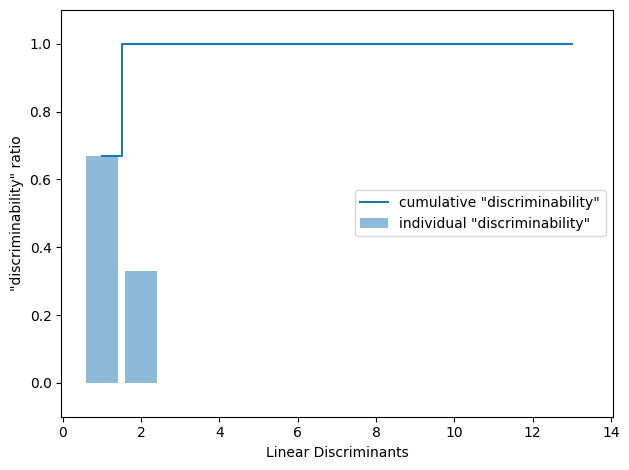

In [33]:
#선형 판별 벡터 그리기
tot=sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

처음 두 개의 선형 판별 벡터가 Wine dataset의 정보 중 거의 100%를 잡아낸다.

In [34]:
#두 판별 벡터를 열로 쌓아서 변환행렬 W만들기
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


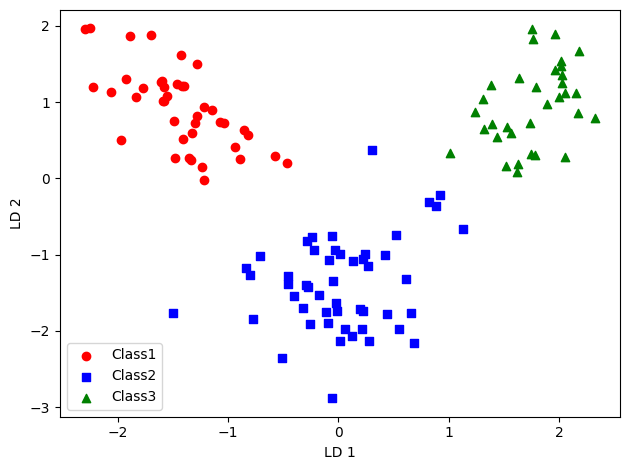

In [35]:
#새로운 특성 공간으로 샘플 투영
X_train_lda = X_train_std.dot(w)
colors = ['r','b','g']
markers = ['o','s','^']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1]*(-1), c=c, label=f'Class{l}', marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()
#

처음 두 개의 판별 벡터로 투영하여 완벽하게 구분할 수 있는 와인 Class들

In [36]:
#64차원 dataset에 t-SNE 적용해보기
##저해상도 손글씨 숫자 (0~9) 데이터 로드
from sklearn.datasets import load_digits
digits = load_digits()

<function matplotlib.pyplot.show(close=None, block=None)>

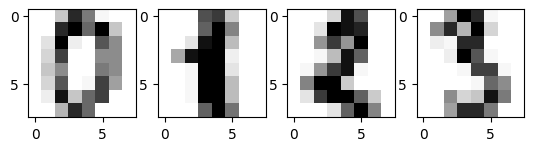

In [37]:
fig, ax = plt.subplots(1,4)
for i in range(4):
  ax[i].imshow(digits.images[i], cmap='Greys')
plt.show

In [38]:
#sample이 행, pixel(feature)이 열로 표현
digits.data.shape

(1797, 64)

In [39]:
#feature(pixel)를 새 변수 X_digit에 할당, label을 또 다른 변수 y_digits에 할당
y_digits = digits.target
X_digits = digits.data

In [40]:
#tsne 객체 훈련
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca',random_state=123)
X_digits_tsne=tsne.fit_transform(X_digits)

64차원 데이터셋을 2차원 공간에 투영한 것

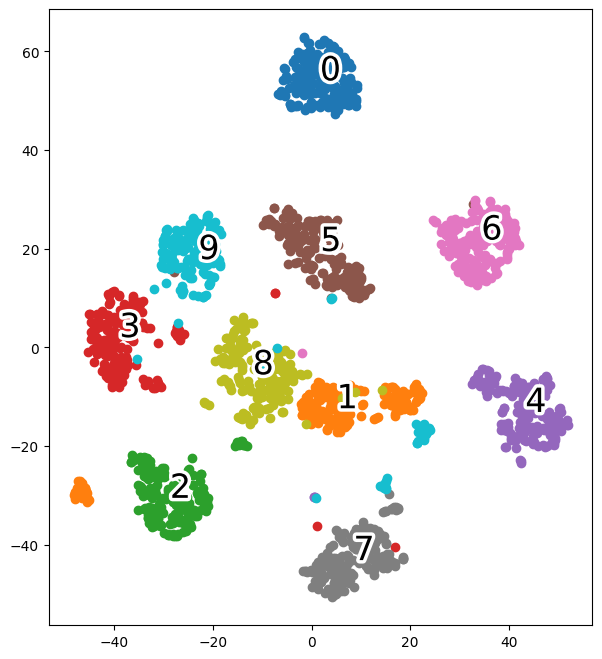

In [41]:
#2D t-SNE 임베딩 시각화하기
import matplotlib.patheffects as PathEffects
def plot_projection(x,colors):
  f = plt.figure(figsize=(8,8))
  ax = plt.subplot(aspect='equal')
  for i in range(10):
    plt.scatter(x[colors==i, 0],
                x[colors==i, 1])
  for i in range(10):
    xtext, ytext = np.median(x[colors==i, :], axis=0)
    txt = ax.text(xtext, ytext, str(i), fontsize=24)
    txt.set_path_effects([PathEffects.Stroke(linewidth=5, foreground='w'), PathEffects.Normal()])

plot_projection(X_digits_tsne, y_digits)
plt.show()

t-SNE는 비지도 방법. 손글씨 숫자를 2d 특성 공간으로 축소한 t-SNE의 임베딩 시각화